In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Leemos CSV1 
df=pd.read_csv('Csvs/HighestGrossers.csv')
df=df.drop(['TOTAL FOR YEAR','TOTAL IN 2019 DOLLARS','TICKETS SOLD','MOVIE'],axis=1)
df

,YEAR,GENRE,MPAA RATING,DISTRIBUTOR
0,1995,Drama,PG-13,Warner Bros.
1,1996,Adventure,PG-13,20th Century Fox
2,1997,Adventure,PG-13,Sony Pictures
3,1998,Adventure,PG-13,Paramount Pictures
4,1999,Adventure,PG,20th Century Fox
5,2000,Adventure,PG,Universal
6,2001,Adventure,PG,Warner Bros.
7,2002,Adventure,PG-13,Sony Pictures
8,2003,Adventure,G,Walt Disney
9,2004,Adventure,PG,Dreamworks SKG


In [3]:
df =pd.get_dummies(data=df,drop_first=True)
df=df.rename(columns={'DISTRIBUTOR_Warner Bros.':'WarnerBros'})

In [4]:
explicativas = df.drop(columns=['WarnerBros'])
objetivo = df.WarnerBros

In [5]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X=explicativas,y=objetivo)

DecisionTreeClassifier(max_depth=5)

[Text(434.00000000000006, 398.64, 'YEAR <= 1995.5\ngini = 0.252\nsamples = 27\nvalue = [23, 4]'),
 Text(347.20000000000005, 326.15999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(520.8000000000001, 326.15999999999997, 'DISTRIBUTOR_Walt Disney <= 0.5\ngini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(434.00000000000006, 253.67999999999998, 'YEAR <= 2007.5\ngini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(260.40000000000003, 181.2, 'MPAA RATING_PG-13 <= 0.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(173.60000000000002, 108.71999999999997, 'YEAR <= 2000.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(86.80000000000001, 36.23999999999995, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(260.40000000000003, 36.23999999999995, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(347.20000000000005, 108.71999999999997, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(607.6000000000001, 181.2, 'DISTRIBUTOR_Sony Pictures <= 0.5\ngini = 0.5\nsamples = 4\nvalue

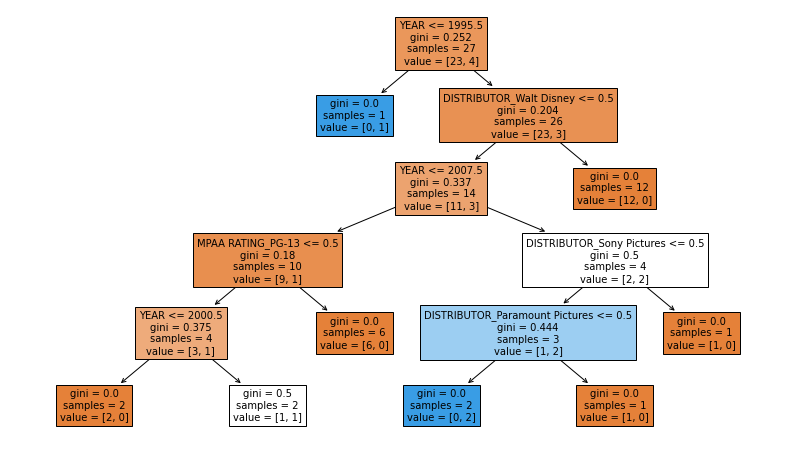

In [6]:
plt.figure(figsize=(14,8))
plot_tree(decision_tree=model,feature_names=explicativas.columns,filled=True,fontsize=10)

In [7]:
a = explicativas.sample()
a

,YEAR,GENRE_Adventure,GENRE_Drama,MPAA RATING_PG,MPAA RATING_PG-13,MPAA RATING_R,DISTRIBUTOR_Dreamworks SKG,DISTRIBUTOR_Paramount Pictures,DISTRIBUTOR_Sony Pictures,DISTRIBUTOR_Universal,DISTRIBUTOR_Walt Disney
2,1997,1,0,0,1,0,0,0,1,0,0


In [8]:
model.predict_proba(a)

array([[1., 0.]])

In [9]:
y_pred=model.predict(explicativas)

<AxesSubplot:xlabel='YEAR', ylabel='Count'>

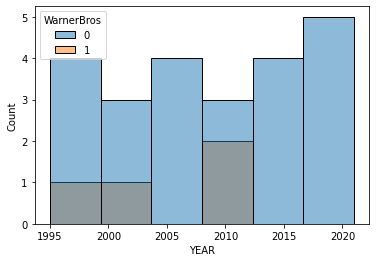

In [14]:
sns.histplot(x=df.YEAR,hue=df.WarnerBros)

In [11]:
df['pred']=y_pred

In [13]:
df[['YEAR','WarnerBros','pred']]

,YEAR,WarnerBros,pred
0,1995,1,1
1,1996,0,0
2,1997,0,0
3,1998,0,0
4,1999,0,0
5,2000,0,0
6,2001,1,0
7,2002,0,0
8,2003,0,0
9,2004,0,0
